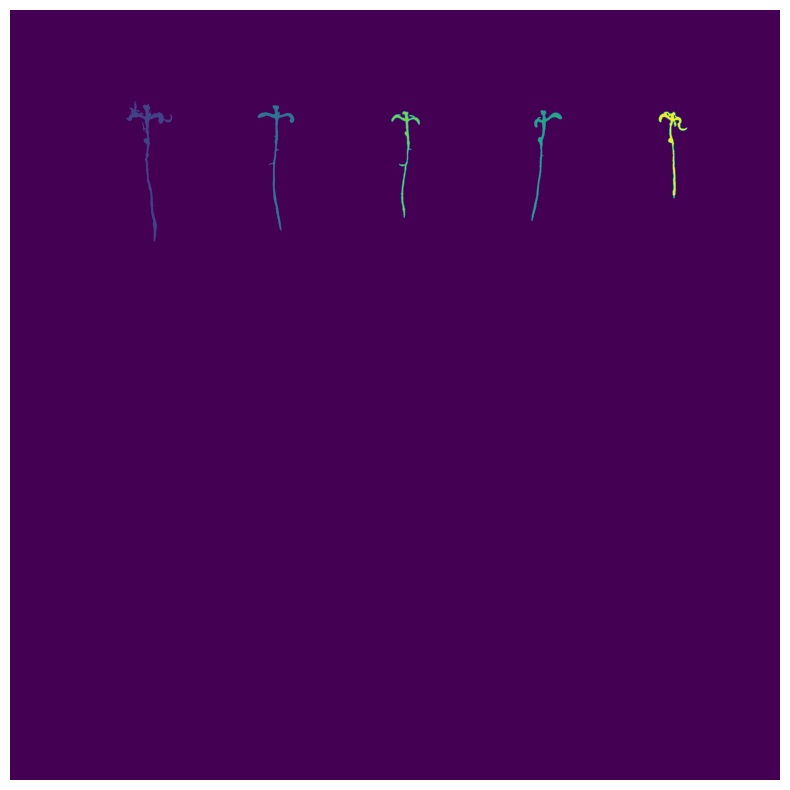

In [85]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def highlight_large_regions(image_path, min_size=1000, vertical_cutoff=500, size_threshold=4000):
    """
    Identify and highlight significant connected regions in an image using thresholding and filtering.

    Args:
    - image_path: Path to the input image file.
    - min_size: Minimum size of connected components to consider.
    - vertical_cutoff: Maximum vertical position (in pixels) for components to be considered valid.
    - size_threshold: Minimum size of connected regions to be highlighted.

    The function applies preprocessing steps such as cropping, thresholding, and connected components analysis 
    to identify and visualize large regions in the image.
    """
    # Load the grayscale version of the image
    grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if grayscale_image is None:
        raise ValueError(f"Image not found at path: {image_path}")

    # Ensure the image is square by cropping excess dimensions
    height, width = grayscale_image.shape
    if width > height:
        # Crop equally from left and right if the image is wider than it is tall
        offset = (width - height) // 2
        grayscale_image = grayscale_image[:, offset:offset + height]
    elif height > width:
        # Crop equally from top and bottom if the image is taller than it is wide
        offset = (height - width) // 2
        grayscale_image = grayscale_image[offset:offset + width, :]

    # Apply Otsu's thresholding to create a binary mask
    _, binary_mask = cv2.threshold(grayscale_image, 160, 255, cv2.THRESH_BINARY_INV)

    # Perform connected components analysis
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_mask)

    # Filter components based on size and vertical position criteria
    valid_components = []
    for label_index in range(2, num_labels):  # Start from index 2 to skip the background
        area = stats[label_index, cv2.CC_STAT_AREA]  # Area of the component
        top_position = stats[label_index, cv2.CC_STAT_TOP]  # Vertical top position of the component

        # Check if the component meets the size and vertical cutoff criteria
        if area > size_threshold and top_position < vertical_cutoff:
            valid_components.append(label_index)

    # Create an output image to visualize valid regions
    output_image = np.zeros_like(labels, dtype=np.float32)  # Use float32 for better colormap visualization

    # Highlight valid regions with unique intensities
    for idx, label in enumerate(valid_components):
        output_image[labels == label] = idx + 1  # Assign a unique value for each valid component

    # Display the results using a visually appealing colormap
    plt.figure(figsize=(10, 10))
    plt.imshow(output_image, cmap='viridis')  # Use the 'viridis' colormap for visualization
    plt.axis('off')  # Hide axis labels for better clarity
    plt.show()

# Specify the image path
image_path = "C:\\Users\\Michon\\Downloads\\task_3_image_1.png"

# Call the function with the specified image path
highlight_large_regions(image_path)


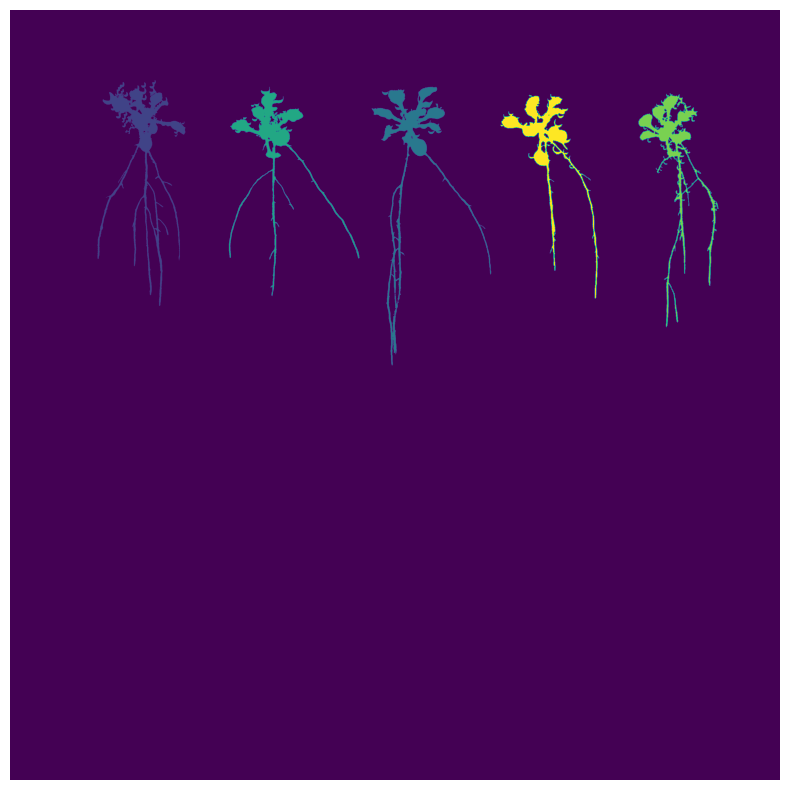

In [84]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def highlight_large_regions(image_path, min_size=1000, vertical_cutoff=500, size_threshold=4000):
    """
    Identify and highlight significant connected regions in an image using thresholding and filtering.

    Args:
    - image_path (str): Path to the input image file.
    - min_size (int): Minimum size of connected components to be considered (not used in the current logic).
    - vertical_cutoff (int): Maximum vertical position (in pixels) for components to be considered valid.
    - size_threshold (int): Minimum size of connected regions to be highlighted.

    This function processes the image to:
    1. Convert it to grayscale.
    2. Crop it to make it square.
    3. Apply thresholding to identify binary regions.
    4. Analyze connected components.
    5. Highlight regions that meet the size and position criteria.
    """
    # Step 1: Load the image and convert it to grayscale
    grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if grayscale_image is None:
        raise ValueError(f"Image not found at path: {image_path}")

    # Step 2: Ensure the image is square by cropping the longer dimension
    height, width = grayscale_image.shape
    if width > height:
        # Crop equally from the left and right if the image is wider than it is tall
        offset = (width - height) // 2
        grayscale_image = grayscale_image[:, offset:offset + height]
    elif height > width:
        # Crop equally from the top and bottom if the image is taller than it is wide
        offset = (height - width) // 2
        grayscale_image = grayscale_image[offset:offset + width, :]

    # Step 3: Apply Otsu's thresholding to create a binary mask
    # Threshold value 160 is used, and regions below this threshold are considered foreground
    _, binary_mask = cv2.threshold(grayscale_image, 160, 255, cv2.THRESH_BINARY_INV)

    # Step 4: Perform connected components analysis
    # This identifies connected regions in the binary mask
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_mask)

    # Step 5: Filter components based on size and vertical position criteria
    valid_components = []
    for label_index in range(2, num_labels):  # Start from index 2 to exclude background and small components
        area = stats[label_index, cv2.CC_STAT_AREA]  # Area of the component
        top_position = stats[label_index, cv2.CC_STAT_TOP]  # Vertical top position of the component

        # Check if the component meets the size and vertical cutoff criteria
        if area > size_threshold and top_position < vertical_cutoff:
            valid_components.append(label_index)

    # Step 6: Create an output image to visualize valid regions
    # Float32 is used for better compatibility with color maps
    output_image = np.zeros_like(labels, dtype=np.float32)

    # Assign unique intensity values to each valid component
    for idx, label in enumerate(valid_components):
        output_image[labels == label] = idx + 1  # Assign a unique value for each valid region

    # Step 7: Display the resulting highlighted regions
    # The 'viridis' colormap is used for better visualization of the highlighted regions
    plt.figure(figsize=(10, 10))
    plt.imshow(output_image, cmap='viridis')  # Visualize the output with a color map
    plt.axis('off')  # Hide axis labels for a cleaner display
    plt.show()

# Specify the image path
image_path = "C:\\Users\\Michon\\Downloads\\task_3_image_2.png"

# Call the function with the specified image path
highlight_large_regions(image_path)
